* **exercise**<br>
_Bir grup insanın diyet yaparken yağ tüketip tüketmemelerine göre nabızlarının ne kadar olduğunun ölçülmesidir_
    * id: Deney yapılan kişinin numarası (1- 30)
    * diet: Diyet yaparken ne kadar yağla beslendiği (no fat, low fat)
    * pulse: Kişinin nabız (80-150)
    * time: Yaptığı eylem sırasında geçen süre
    * kind: Yaptığı eylem, içinde bulunduğu durum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
exercise = sns.load_dataset("exercise")
df = exercise.copy()

In [2]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


# İlk sütunu silme

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

In [4]:
df.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [5]:
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [6]:
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


# Veri Seti Üzerinden Bilgi Edinme

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90.0,15.5,8.703932,1.0,8.00,15.5,23.0,30.0
pulse,90.0,99.7,14.858471,80.0,90.25,96.0,103.0,150.0


In [8]:
df.shape

(90, 5)

In [9]:
df.info

<bound method DataFrame.info of     id     diet  pulse    time     kind
0    1  low fat     85   1 min     rest
1    1  low fat     85  15 min     rest
2    1  low fat     88  30 min     rest
3    2  low fat     90   1 min     rest
4    2  low fat     92  15 min     rest
..  ..      ...    ...     ...      ...
85  29   no fat    135  15 min  running
86  29   no fat    130  30 min  running
87  30   no fat     99   1 min  running
88  30   no fat    111  15 min  running
89  30   no fat    150  30 min  running

[90 rows x 5 columns]>

In [10]:
df.size

450

In [28]:
for item in df.columns:
    print(f"{item} -> {df[item].unique().shape[0]}")  # unique value counts in dataframe

id -> 30
diet -> 2
pulse -> 39
time -> 3
kind -> 3


In [31]:
df_pivot = df.drop("id", axis = 1)
df_pivot.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


# Pivot Table

In [32]:
table = pd.pivot_table(data = df_pivot, index = ["diet", "time", "kind"])
table

pulse
diet    time   kind          
no fat  1 min  rest      91.8
               walking   95.6
               running   98.2
        15 min rest      92.2
               walking   98.6
               running  124.4
        30 min rest      93.0
               walking   96.6
               running  140.6
low fat 1 min  rest      88.6
               walking   90.6
               running   94.0
        15 min rest      89.6
               walking   94.6
               running  109.8
        30 min rest      89.8
               walking   95.2
               running  111.4

In [33]:
table = pd.pivot_table(data = df_pivot, index = ["diet", "time", "kind"], aggfunc={"pulse":[np.mean, np.sum, np.max, np.min]})
table

pulse                 
                        amax amin   mean  sum
diet    time   kind                          
no fat  1 min  rest      100   83   91.8  459
               walking   103   84   95.6  478
               running   103   94   98.2  491
        15 min rest       99   83   92.2  461
               walking   109   86   98.6  493
               running   135  111  124.4  622
        30 min rest      100   84   93.0  465
               walking   103   89   96.6  483
               running   150  130  140.6  703
low fat 1 min  rest       97   80   88.6  443
               walking    95   86   90.6  453
               running    98   87   94.0  470
        15 min rest       97   82   89.6  448
               walking   103   86   94.6  473
               running   132   98  109.8  549
        30 min rest       94   83   89.8  449
               walking   104   84   95.2  476
               running   120   99  111.4  557

In [35]:
table = pd.pivot_table(data = df_pivot, index = ["diet", "time", "kind"], values = ["pulse"], aggfunc= [np.mean, np.sum, np.max, np.min])
table

mean   sum  amax  amin
                        pulse pulse pulse pulse
diet    time   kind                            
no fat  1 min  rest      91.8   459   100    83
               walking   95.6   478   103    84
               running   98.2   491   103    94
        15 min rest      92.2   461    99    83
               walking   98.6   493   109    86
               running  124.4   622   135   111
        30 min rest      93.0   465   100    84
               walking   96.6   483   103    89
               running  140.6   703   150   130
low fat 1 min  rest      88.6   443    97    80
               walking   90.6   453    95    86
               running   94.0   470    98    87
        15 min rest      89.6   448    97    82
               walking   94.6   473   103    86
               running  109.8   549   132    98
        30 min rest      89.8   449    94    83
               walking   95.2   476   104    84
               running  111.4   557   120    99

In [36]:
table = pd.pivot_table(data = df_pivot, index = ["diet", "time", "kind"], values = ["pulse"], aggfunc= np.mean)
table

pulse
diet    time   kind          
no fat  1 min  rest      91.8
               walking   95.6
               running   98.2
        15 min rest      92.2
               walking   98.6
               running  124.4
        30 min rest      93.0
               walking   96.6
               running  140.6
low fat 1 min  rest      88.6
               walking   90.6
               running   94.0
        15 min rest      89.6
               walking   94.6
               running  109.8
        30 min rest      89.8
               walking   95.2
               running  111.4

<AxesSubplot:xlabel='diet,time,kind'>

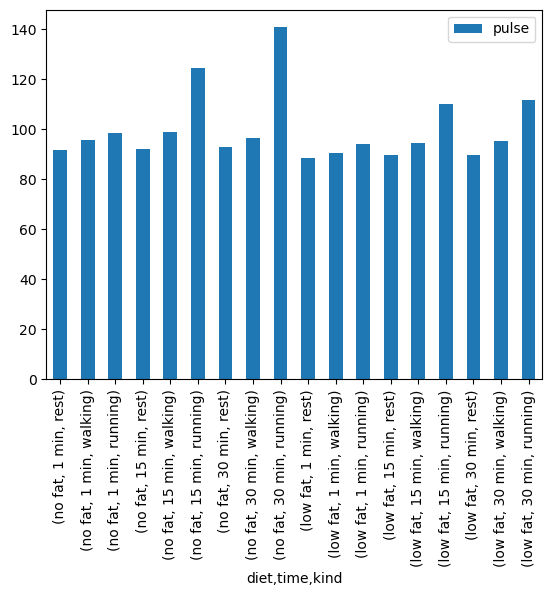

In [37]:
table.plot(kind = "bar")

In [39]:
table = pd.pivot_table(df, index=["diet", "time"], columns=["kind"], values=["pulse"], aggfunc=np.mean)
table

pulse                
kind            rest walking running
diet    time                        
no fat  1 min   91.8    95.6    98.2
        15 min  92.2    98.6   124.4
        30 min  93.0    96.6   140.6
low fat 1 min   88.6    90.6    94.0
        15 min  89.6    94.6   109.8
        30 min  89.8    95.2   111.4

<AxesSubplot:xlabel='diet,time'>

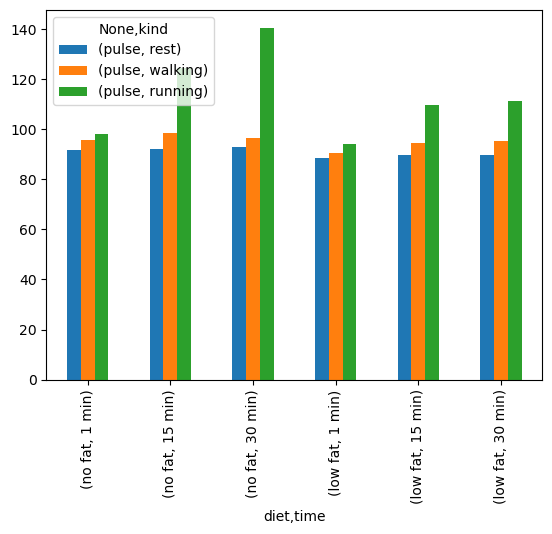

In [40]:
table.plot(kind = "bar")

# Kategorik Değişkenlerle Tablo Yapmak

In [41]:
df.dtypes

id          int64
diet     category
pulse       int64
time     category
kind     category
dtype: object

In [47]:
for item in df.select_dtypes(include = "category").columns:
    print(df[item].value_counts())

no fat     45
low fat    45
Name: diet, dtype: int64
1 min     30
15 min    30
30 min    30
Name: time, dtype: int64
rest       30
walking    30
running    30
Name: kind, dtype: int64


AxesSubplot(0.125,0.653529;0.775x0.226471)
AxesSubplot(0.125,0.381765;0.775x0.226471)
AxesSubplot(0.125,0.11;0.775x0.226471)


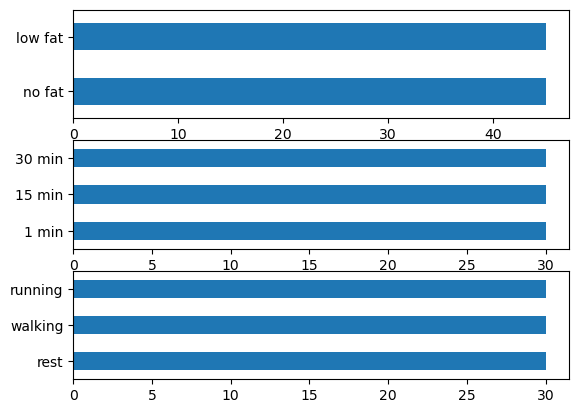

In [51]:
sayac = 1
for item in df.select_dtypes(include = "category").columns:
    plt.subplot(len(df.select_dtypes(include = "category").columns), 1, sayac)
    print(df[item].value_counts().plot.barh())
    sayac = sayac+1

# Barplot

In [53]:
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


<AxesSubplot:xlabel='id', ylabel='pulse'>

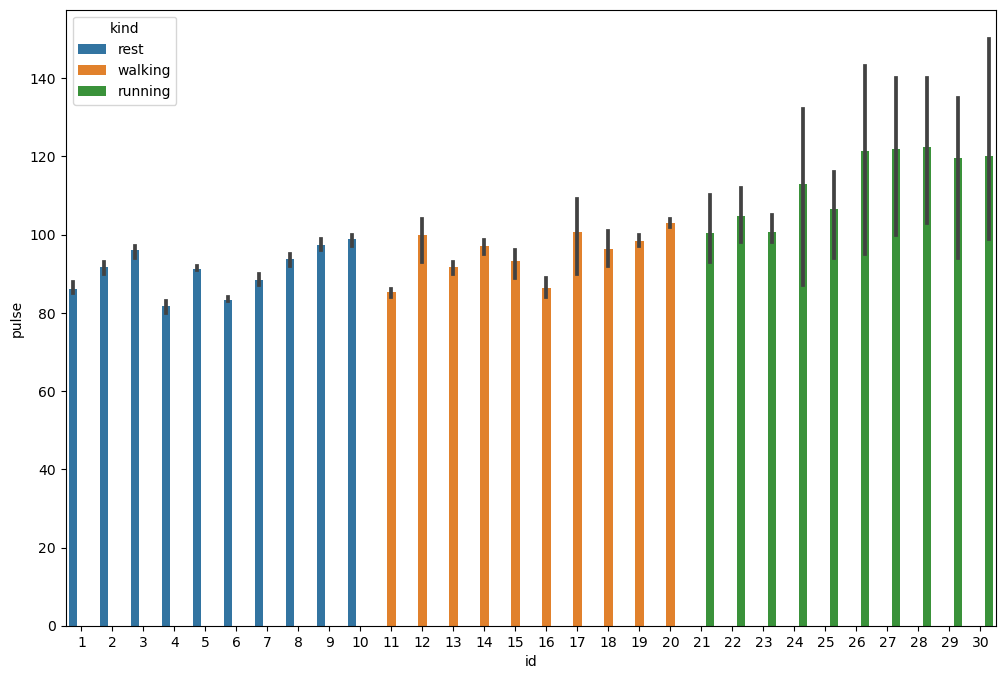

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "id", y = "pulse", hue = "kind", data = df)

<AxesSubplot:xlabel='id', ylabel='pulse'>

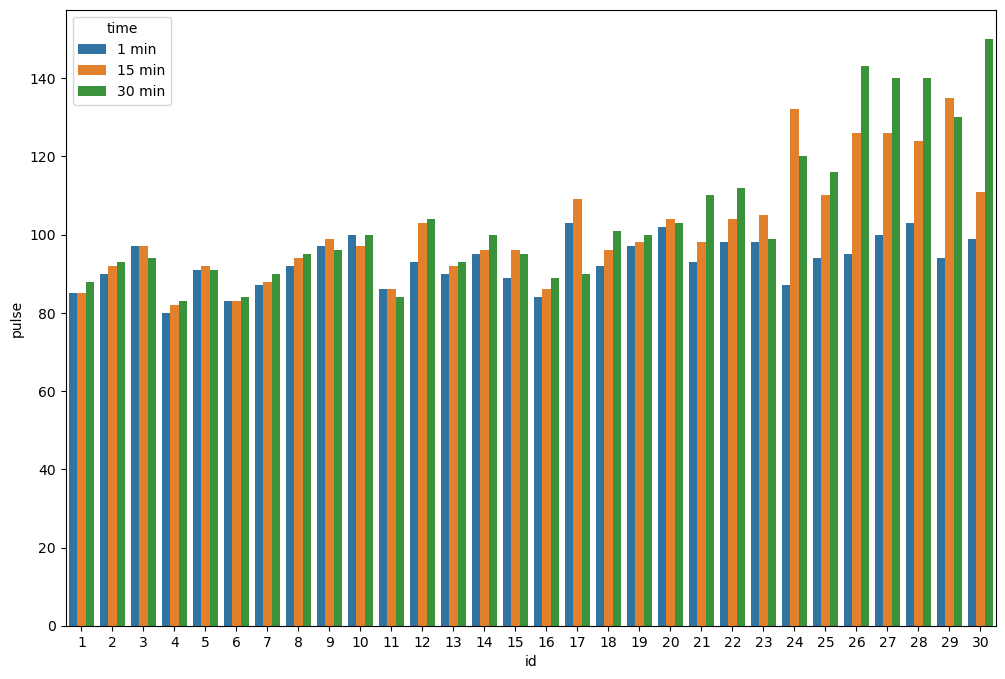

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "id", y = "pulse", hue = "time", data = df)

<AxesSubplot:xlabel='id', ylabel='pulse'>

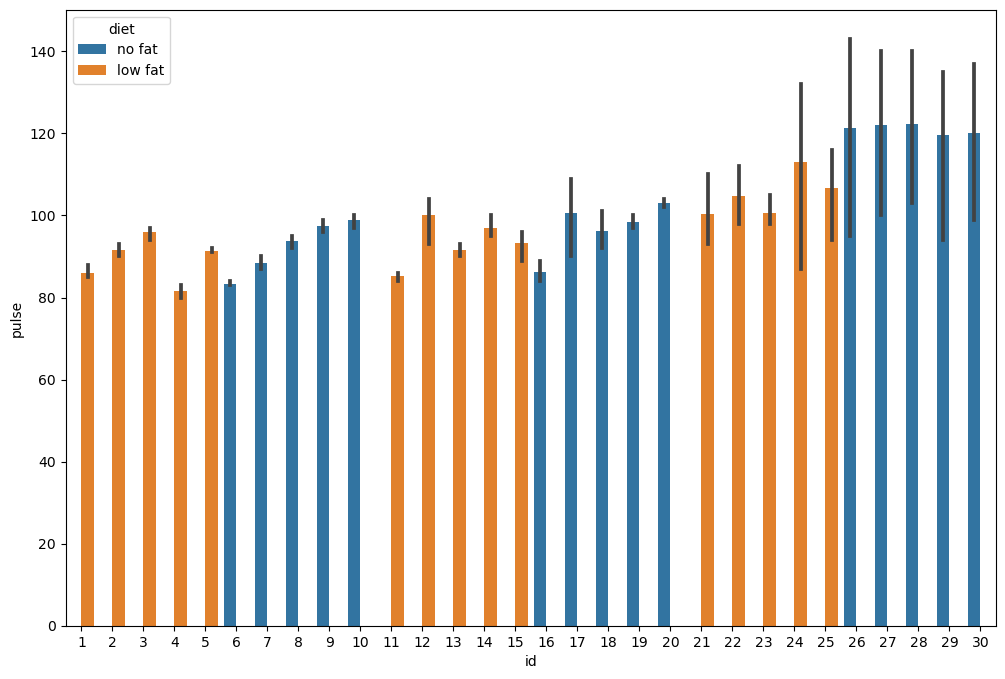

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "id", y = "pulse", hue = "diet", data = df)

In [65]:
import plotly.express as px
fig_pulse = px.bar(df, x = "id", y = "pulse", color = "time", title = "Records of Pulse According To Time")
fig_pulse.show()

In [67]:
fig = px.pie(df, names = "id", values = "pulse", title = "Records of Pulse According To Time")
fig.show()

In [68]:
fig = px.pie(df, names = "kind", values = "pulse", title = "Records of Pulse According To Time")
fig.show()

In [69]:
fig = px.pie(df, names = "time", values = "pulse", title = "Records of Pulse According To Time")
fig.show()

# Catplot

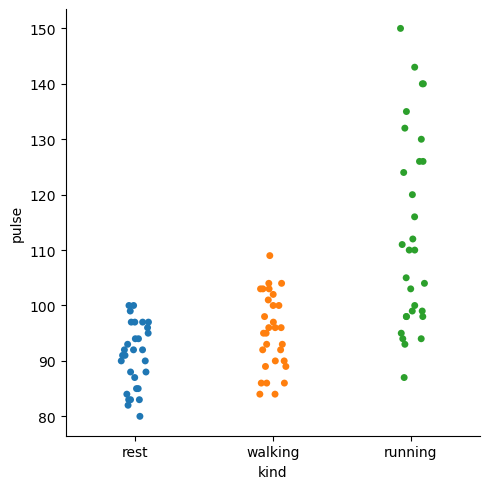

In [78]:
sns.catplot(x = "kind", y = "pulse", data = df)

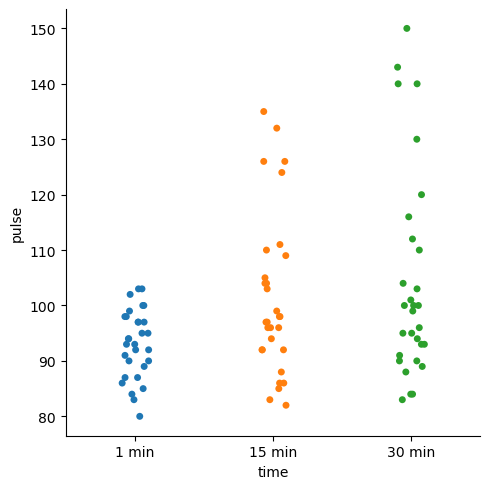

In [79]:
sns.catplot(x = "time", y = "pulse", data = df)

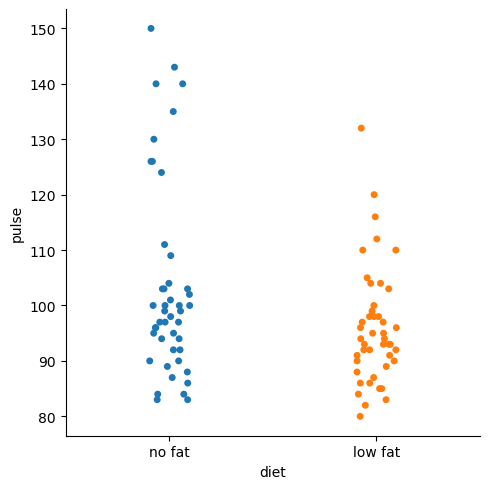

In [81]:
sns.catplot(x = "diet", y = "pulse", data = df)

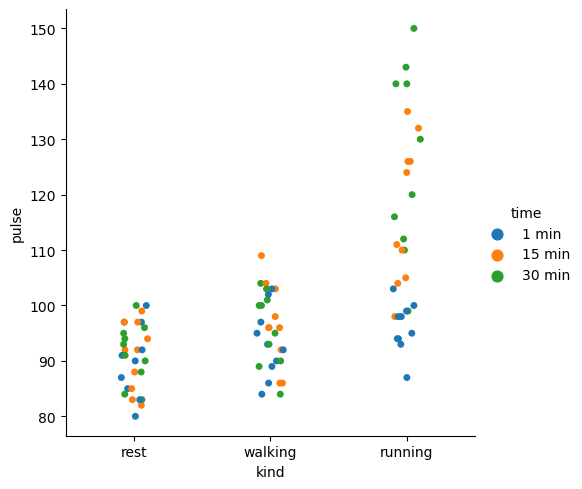

In [82]:
sns.catplot(x = "kind", y = "pulse", hue = "time", data = df)

# GroupBy

In [85]:
df.groupby("diet")["pulse"].mean()

diet
no fat     103.444444
low fat     95.955556
Name: pulse, dtype: float64

In [86]:
df.groupby(["diet", "time", "kind"])["pulse"].mean()

diet     time    kind   
no fat   1 min   rest        91.8
                 walking     95.6
                 running     98.2
         15 min  rest        92.2
                 walking     98.6
                 running    124.4
         30 min  rest        93.0
                 walking     96.6
                 running    140.6
low fat  1 min   rest        88.6
                 walking     90.6
                 running     94.0
         15 min  rest        89.6
                 walking     94.6
                 running    109.8
         30 min  rest        89.8
                 walking     95.2
                 running    111.4
Name: pulse, dtype: float64

In [92]:
df.groupby("id")["pulse"].sum()

id
1     258
2     275
3     288
4     245
5     274
6     250
7     265
8     281
9     292
10    297
11    256
12    300
13    275
14    291
15    280
16    259
17    302
18    289
19    295
20    309
21    301
22    314
23    302
24    339
25    320
26    364
27    366
28    367
29    359
30    360
Name: pulse, dtype: int64

In [93]:
df.groupby("id")["pulse"].sum().sort_values()

id
4     245
6     250
11    256
1     258
16    259
7     265
5     274
2     275
13    275
15    280
8     281
3     288
18    289
14    291
9     292
19    295
10    297
12    300
21    301
23    302
17    302
20    309
22    314
25    320
24    339
29    359
30    360
26    364
27    366
28    367
Name: pulse, dtype: int64

In [91]:
df.groupby("id")["pulse"].sum().sort_values(ascending = False).head(15)

id
28    367
27    366
26    364
30    360
29    359
24    339
25    320
22    314
20    309
17    302
23    302
21    301
12    300
10    297
19    295
Name: pulse, dtype: int64

# Histogram ve Yoğunluk

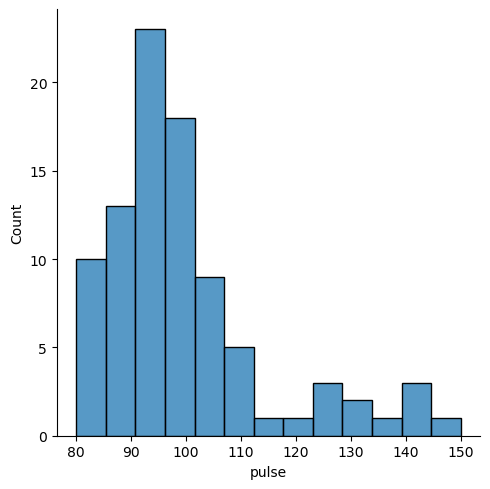

In [97]:
sns.displot(df.pulse, kde = False)

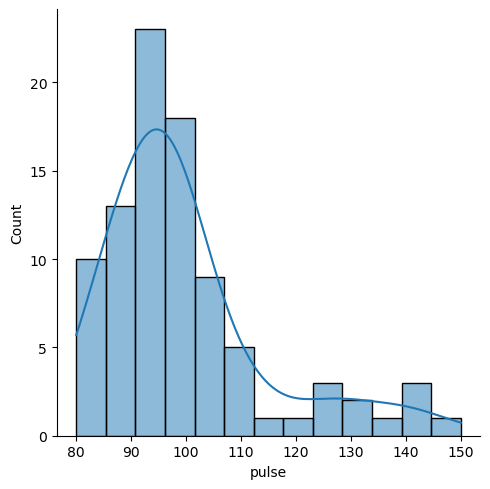

In [96]:
sns.displot(df.pulse, kde = True)

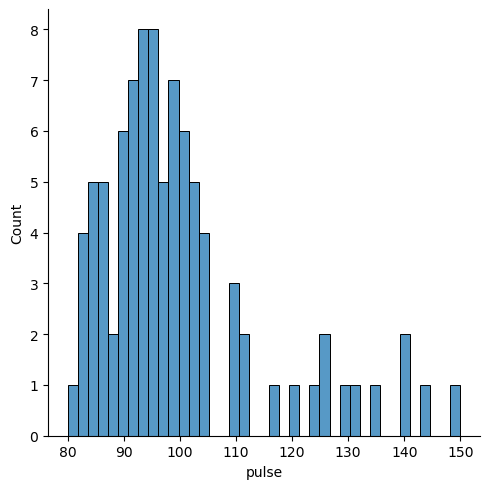

In [98]:
sns.displot(df["pulse"], bins = len(df.pulse.unique()), kde = False)

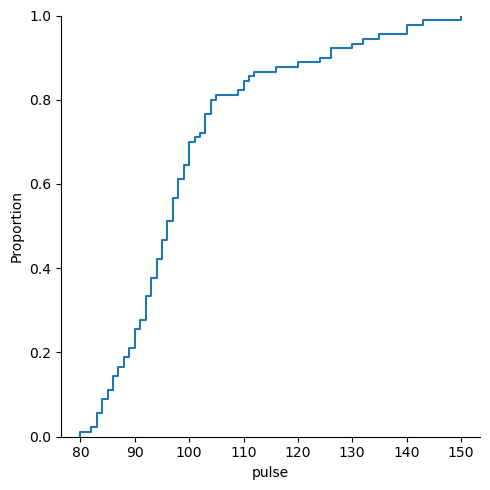

In [102]:
sns.displot(data = df, x = "pulse", kind = "ecdf")

c:\Users\Osman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='pulse', ylabel='Density'>

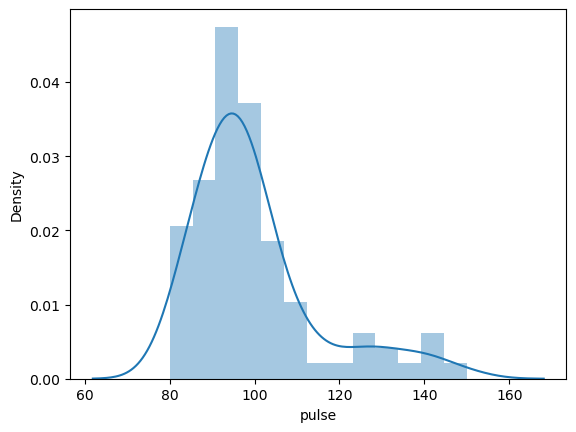

In [103]:
sns.distplot(df.pulse)

c:\Users\Osman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='pulse', ylabel='Density'>

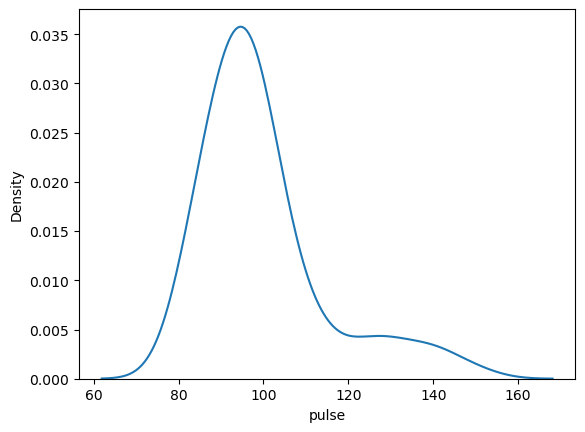

In [104]:
sns.distplot(df.pulse, hist = False)

<AxesSubplot:xlabel='pulse', ylabel='Density'>

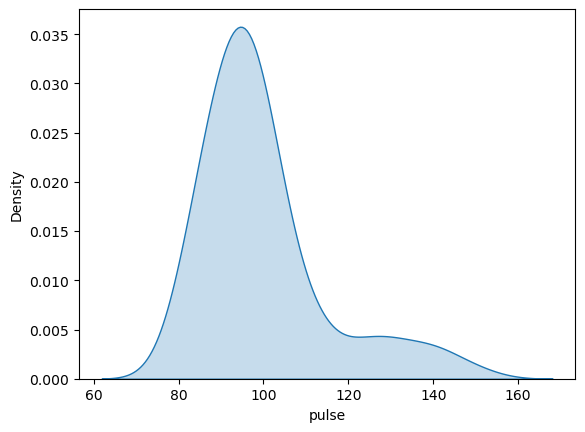

In [107]:
sns.kdeplot(df.pulse, shade = True)

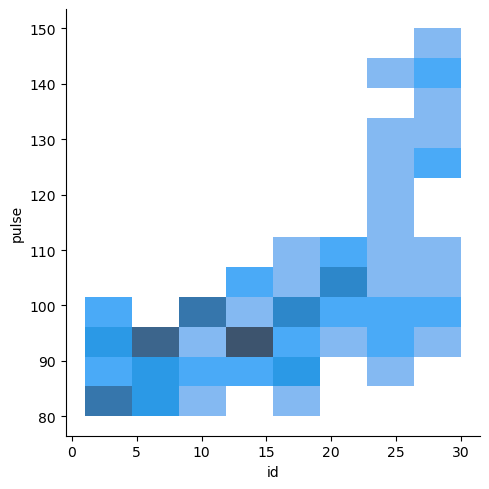

In [109]:
sns.displot(data = df, x = "id", y = "pulse")

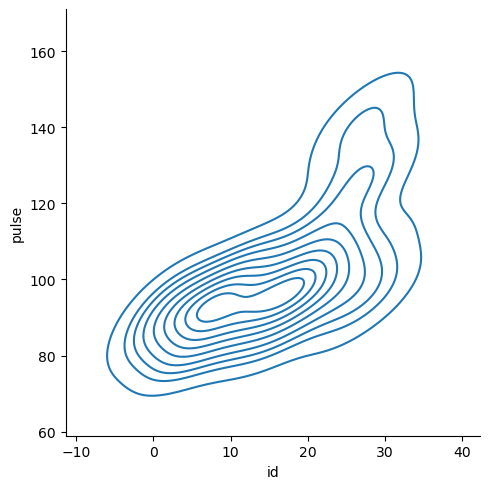

In [110]:
sns.displot(data = df, x = "id", y = "pulse", kind = "kde")

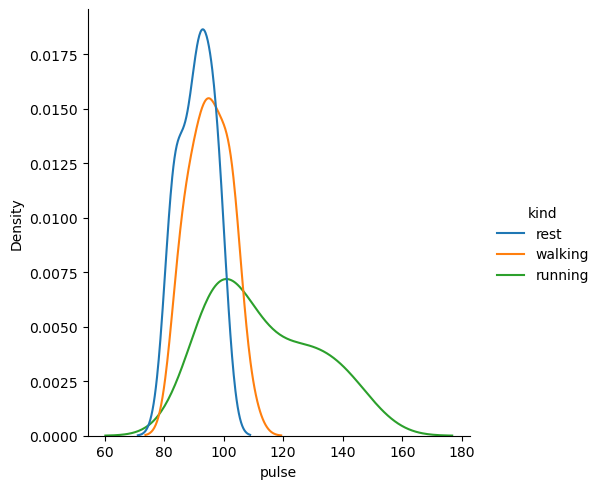

In [115]:
sns.displot(data = df, x = "pulse", hue = "kind", kind = "kde")

# Boxplot

<AxesSubplot:xlabel='pulse'>

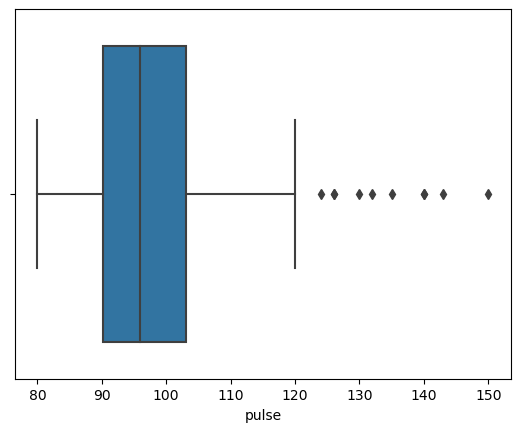

In [116]:
sns.boxplot(x = df["pulse"])

<AxesSubplot:xlabel='pulse', ylabel='time'>

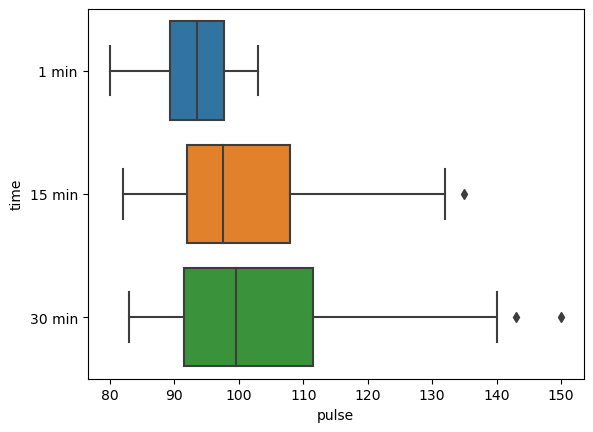

In [118]:
sns.boxplot(x = "pulse", y = "time", data = df)

<AxesSubplot:xlabel='time', ylabel='pulse'>

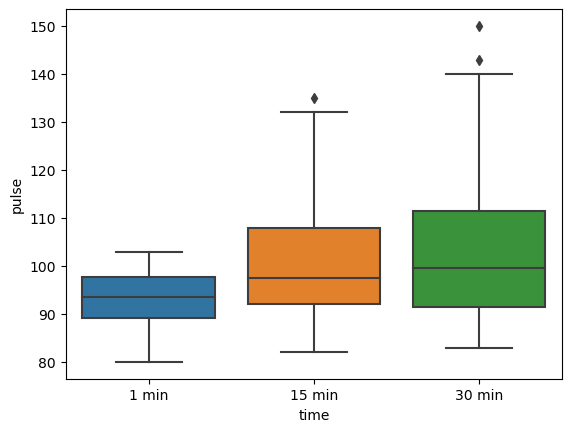

In [119]:
sns.boxplot(x = "time", y = "pulse", data = df)

<AxesSubplot:xlabel='kind', ylabel='pulse'>

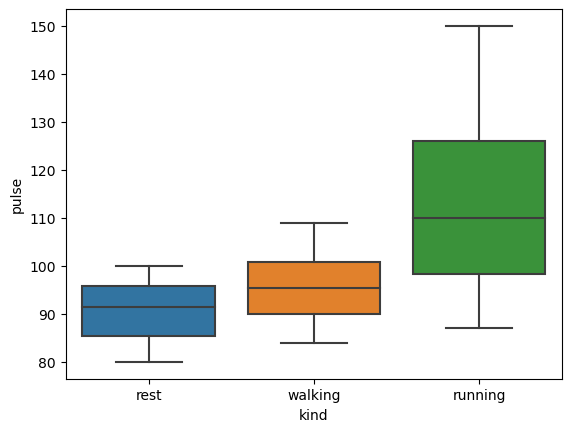

In [120]:
sns.boxplot(x = "kind", y = "pulse", data = df)

<AxesSubplot:xlabel='diet', ylabel='pulse'>

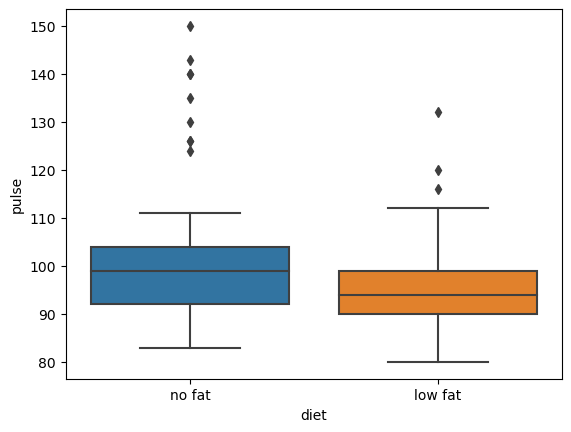

In [121]:
sns.boxplot(x = "diet", y = "pulse", data = df)

# ViolinPlot

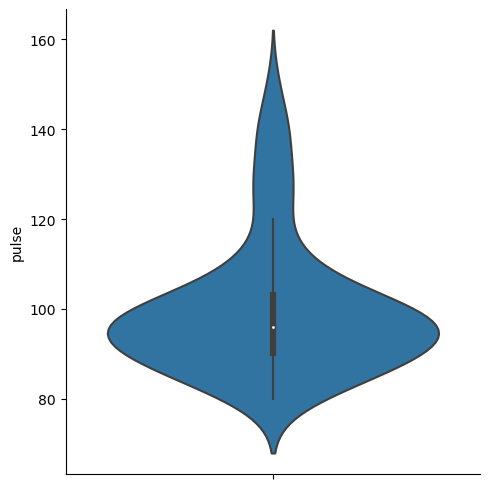

In [123]:
sns.catplot(y = "pulse", kind = "violin", data = df)

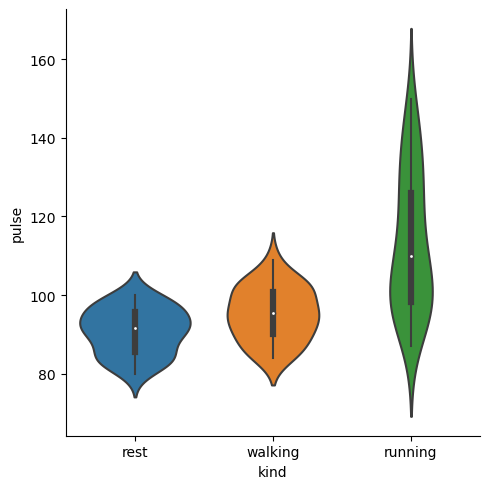

In [124]:
sns.catplot(x = "kind", y = "pulse", kind = "violin", data = df)

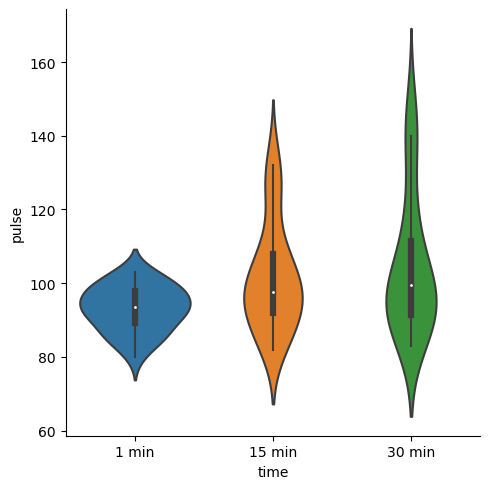

In [125]:
sns.catplot(x = "time", y = "pulse", kind = "violin", data = df)

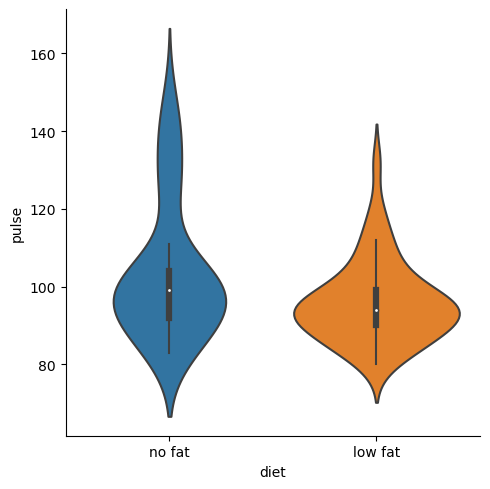

In [126]:
sns.catplot(x = "diet", y = "pulse", kind = "violin", data = df)

<AxesSubplot:xlabel='diet', ylabel='pulse'>

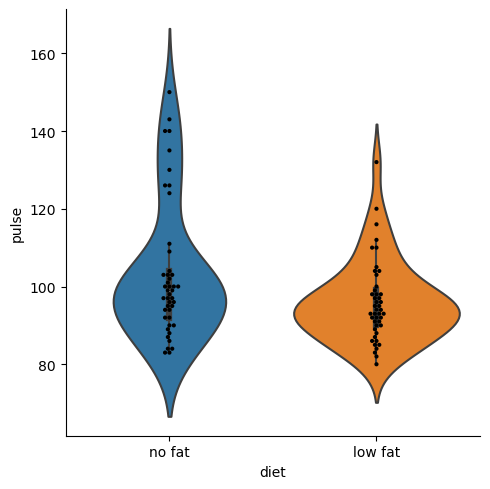

In [127]:
sns.catplot(x = "diet", y = "pulse", kind = "violin", data = df)
sns.swarmplot(x = "diet", y = "pulse", color = "k", size = 3, data = df)

# Relplot

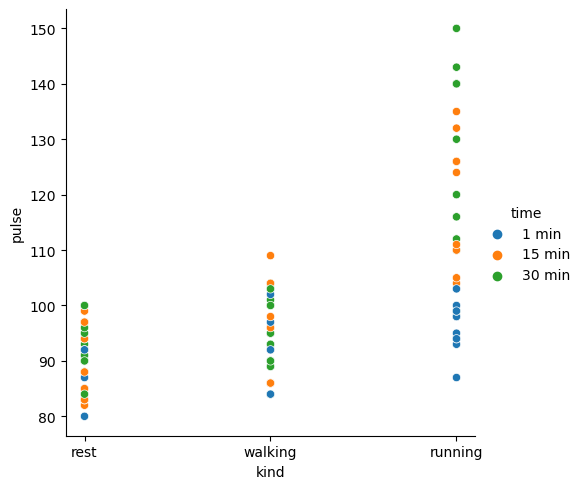

In [128]:
sns.relplot(data = df, x = "kind", y = "pulse", hue = "time")

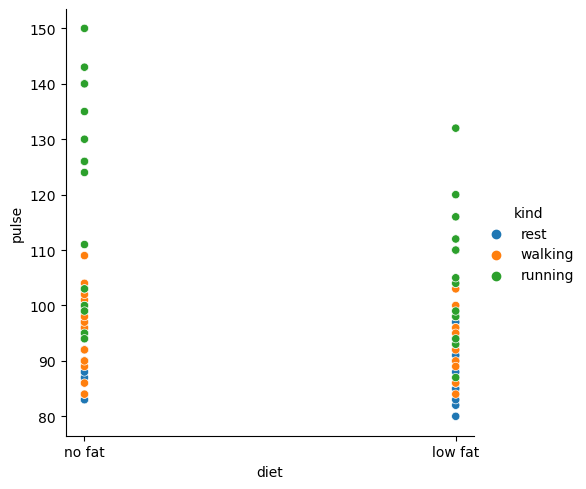

In [129]:
sns.relplot(data = df, x = "diet", y = "pulse", hue = "kind")

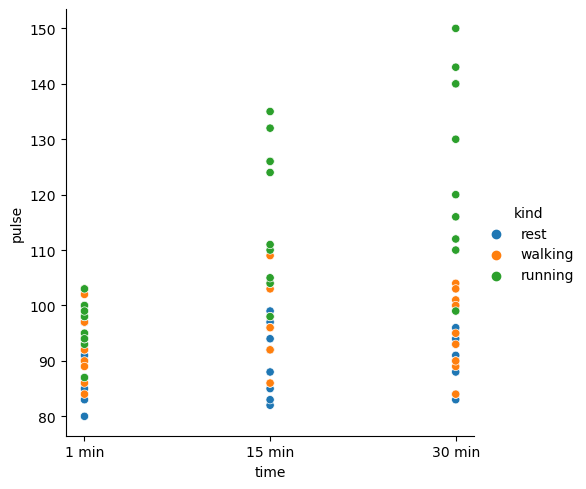

In [131]:
sns.relplot(data = df, x = "time", y = "pulse", hue = "kind")

# Countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '80'),
  Text(1, 0, '82'),
  Text(2, 0, '83'),
  Text(3, 0, '84'),
  Text(4, 0, '85'),
  Text(5, 0, '86'),
  Text(6, 0, '87'),
  Text(7, 0, '88'),
  Text(8, 0, '89'),
  Text(9, 0, '90'),
  Text(10, 0, '91'),
  Text(11, 0, '92'),
  Text(12, 0, '93'),
  Text(13, 0, '94'),
  Text(14, 0, '95'),
  Text(15, 0, '96'),
  Text(16, 0, '97'),
  Text(17, 0, '98'),
  Text(18, 0, '99'),
  Text(19, 0, '100'),
  Text(20, 0, '101'),
  Text(21, 0, '102'),
  Text(22, 0, '103'),
  Text(23, 0, '104'),
  Text(24, 0, '105'),
  Text(25, 0, '109'),
  Text(26, 0, '110'),
  Text(27, 0, '111'),
  Text(28, 0, '112'),
  Text(29, 0, '116'),
  Text(30, 0, '120'),
  Text(31, 0, '124'),
  Text(32, 0, '126'),
  Text(33, 0, '130'),
  Text(34, 0, '132'),
  Text(35, 0, '135'),
  Text(36, 0, '140'),
  Text(37, 0, '143'),
  Text(38, 

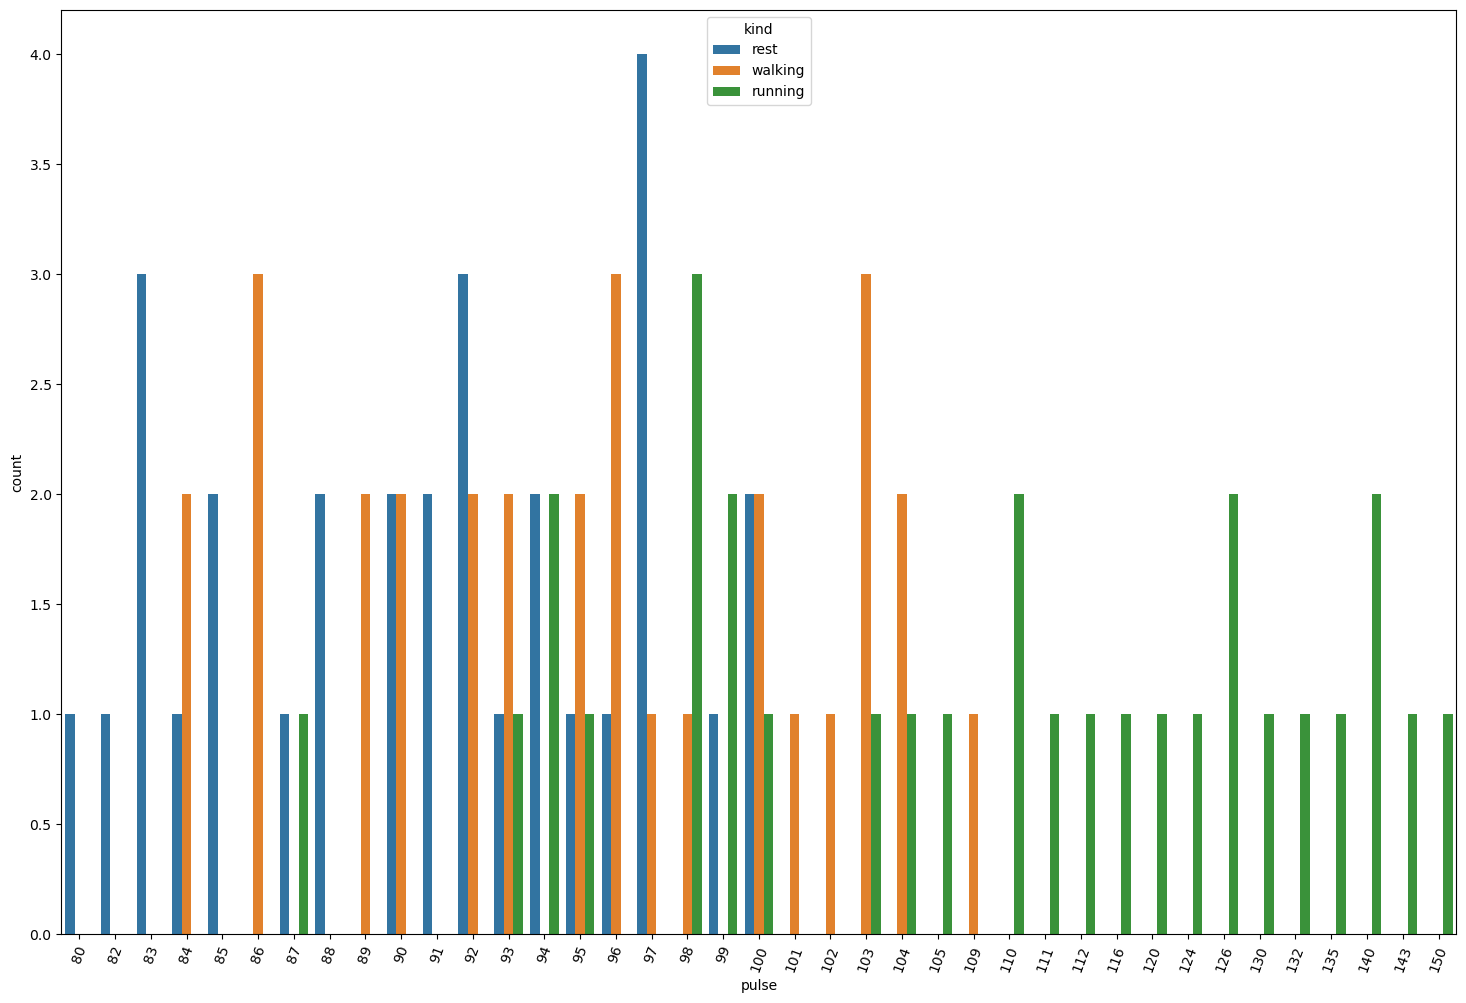

In [136]:
plt.figure(figsize = (18, 12))
sns.countplot(x = "pulse", hue = "kind", data = df)
plt.xticks(rotation = 70)

<AxesSubplot:xlabel='time', ylabel='count'>

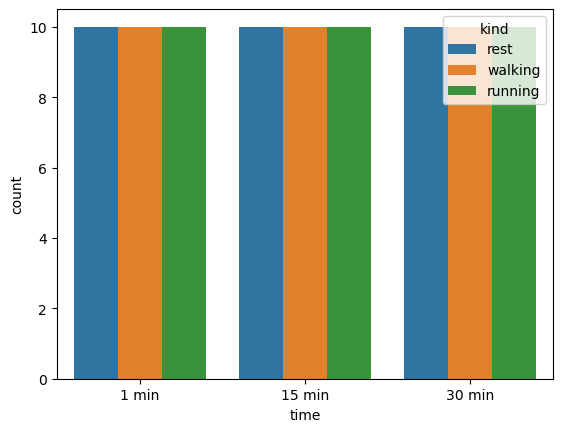

In [139]:
sns.countplot(x = "time", hue = "kind", data = df)

<AxesSubplot:xlabel='diet', ylabel='count'>

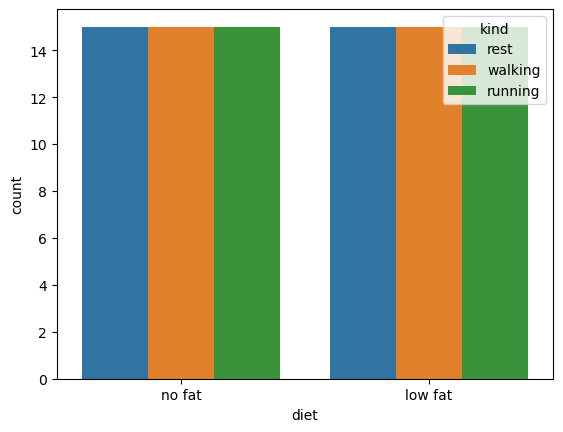

In [140]:
sns.countplot(x = "diet", hue = "kind", data = df)

# PointPlot

<AxesSubplot:xlabel='kind', ylabel='pulse'>

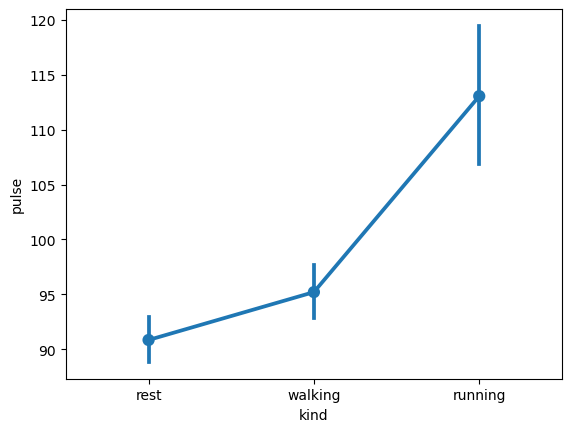

In [141]:
sns.pointplot(x = "kind", y = "pulse", data = df)

<AxesSubplot:xlabel='time', ylabel='pulse'>

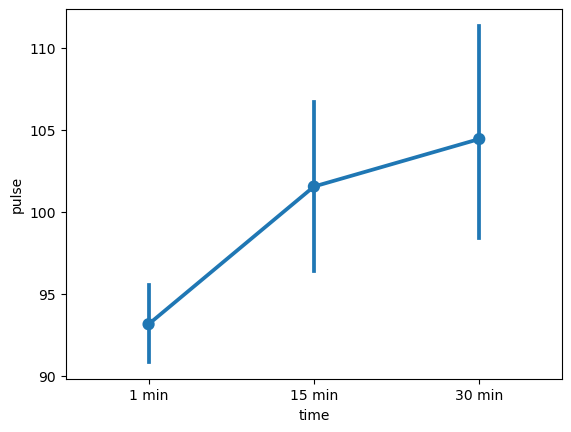

In [142]:
sns.pointplot(x = "time", y = "pulse", data = df)

<AxesSubplot:xlabel='diet', ylabel='pulse'>

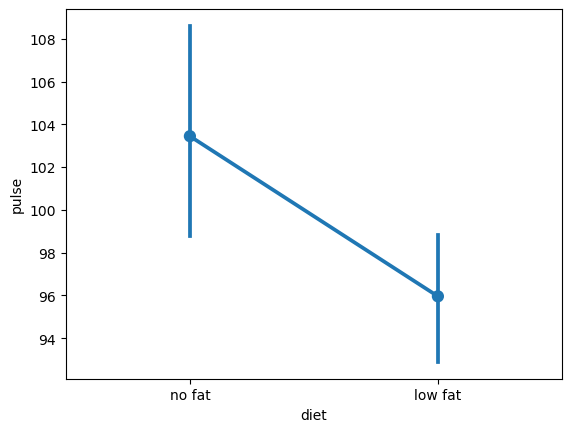

In [143]:
sns.pointplot(x = "diet", y = "pulse", data = df)

# LmPlot Doğrusal İlişki

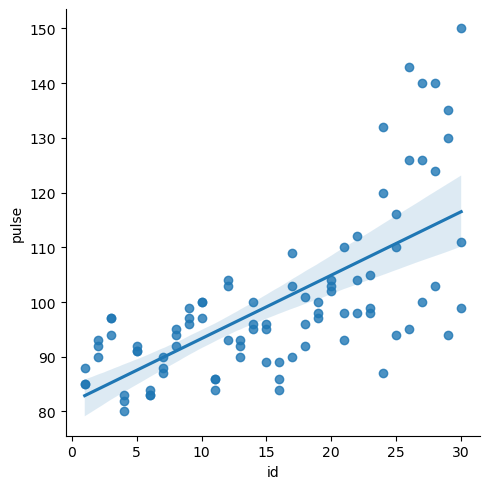

In [145]:
sns.lmplot(x = "id", y = "pulse", data = df) # Direkt bir ilişki kurulamaz

In [147]:
df.select_dtypes(include = ["int64", "float64"]).corr()

,id,pulse
id,1.000000,0.679012
pulse,0.679012,1.000000


# PairPlot Matris Grafik

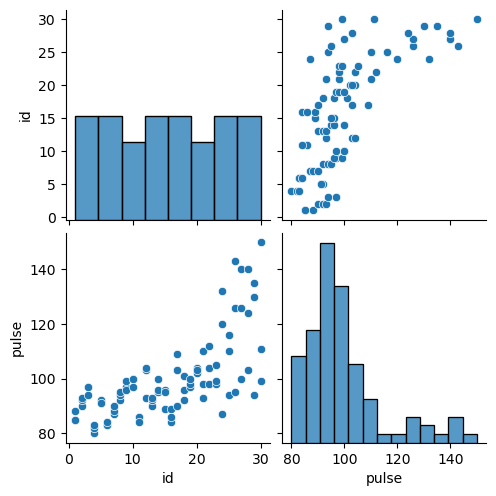

In [149]:
sns.pairplot(data =df)

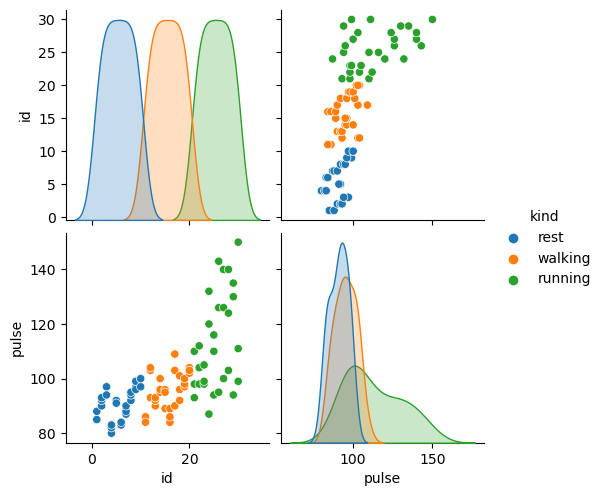

In [150]:
sns.pairplot(data = df, hue = "kind")

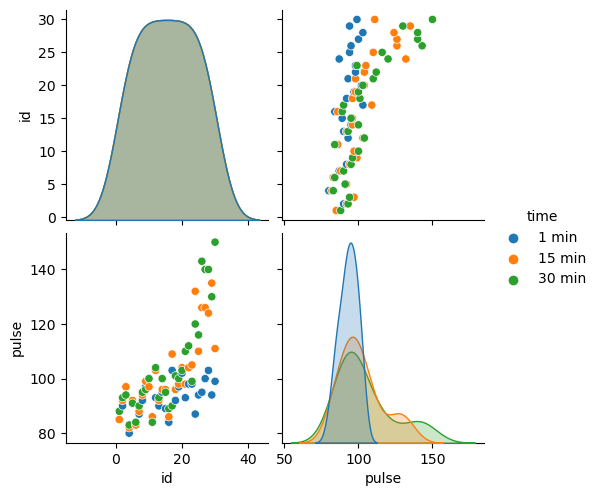

In [151]:
sns.pairplot(data = df, hue = "time")

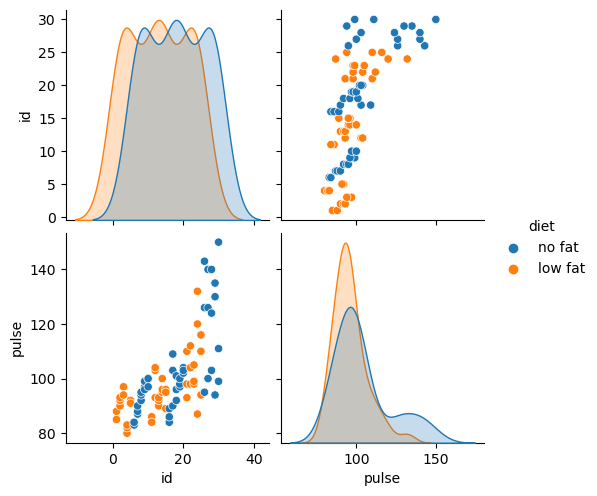

In [152]:
sns.pairplot(data = df, hue = "diet")

# Heatmap

In [153]:
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [154]:
df_num = df.select_dtypes(include = ["int64", "float64"])
df_num.head()

,id,pulse
0,1,85
1,1,85
2,1,88
3,2,90
4,2,92


<AxesSubplot:>

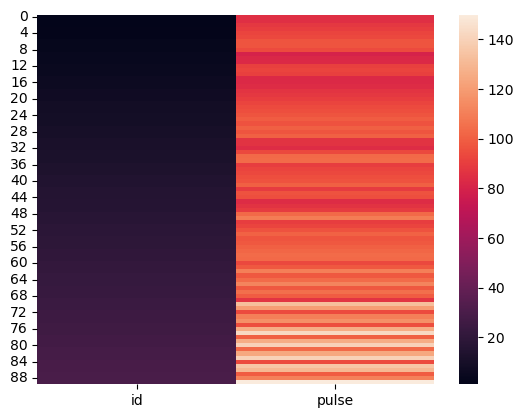

In [155]:
sns.heatmap(data = df_num)